In [1]:
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import math

### Import the required libraries and load the training and testing dataset ###

In [2]:
#Importing the dataset
train = pd.read_csv('./Dataset/train.csv')
test = pd.read_csv('./Dataset/test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


### Check the shape of the training and testing set ###

In [3]:
train.shape,test.shape

((8708, 9), (2178, 9))

###  Check the missing values present in the dataset ###

In [4]:
train.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [5]:
train_label = pd.read_csv('./Dataset/train_label.csv',header=None, names=['Total_Booking'])
train = pd.concat([train,train_label], axis = 1)

test = pd.read_csv('./Dataset/test.csv')
test_label = pd.read_csv('./Dataset/test_label.csv',header=None, names=['Total_Booking'])

In [6]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [7]:
train=train.drop_duplicates()
train.shape

(8708, 10)

###  Check the missing values present in the dataset ###

In [8]:
train.isnull().sum(axis=0)

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

No data cleaning is required since no Null values are found!

# Feature Engineering #

### Create new columns date, hour, weekDay, month from datetime column ###

In [9]:
train['date'] = pd.to_datetime(train.datetime).dt.date
train['hour'] = pd.to_datetime(train.datetime).dt.hour
train['weekDay'] = pd.to_datetime(train.datetime, format='%m/%d/%Y %H:%M').dt.day
train['month'] = pd.to_datetime(train.datetime, format='%m/%d/%Y %H:%M').dt.month

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,hour,weekDay,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,5,9
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,13,1
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,18,11
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,13,9


### Coerce the datatype of season, holiday, workingday, and weather to category ###

In [10]:
train = train.astype({'season':'category', 'holiday':'category','workingday':'category','weather':'category'})

In [11]:
train.shape

(8708, 14)

In [12]:
train.dtypes

datetime           object
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_Booking       int64
date               object
hour                int64
weekDay             int64
month               int64
dtype: object

### Drop the datetime column as we have already extracted useful features from it ###

In [13]:
train = train.drop(columns=['datetime'])
train.shape

(8708, 13)

# Outliers Analysis #

### Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference ###

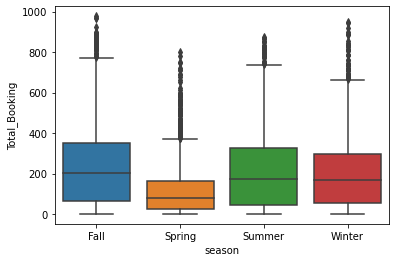

In [14]:
sbn.boxplot(y=train["Total_Booking"], x=train["season"] )
plt.show()

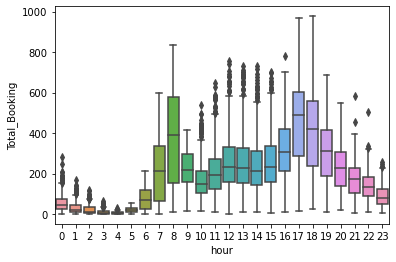

In [15]:
sbn.boxplot(y=train["Total_Booking"], x=train["hour"] )
plt.show()

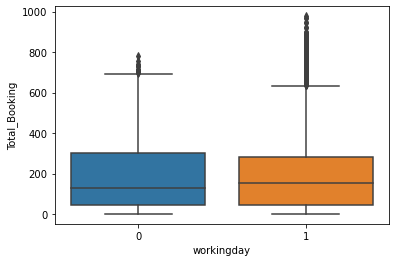

In [16]:
sbn.boxplot(y=train["Total_Booking"], x=train["workingday"])
plt.show()

In [17]:
# finding the zscore values of the numerical columns of the dataset 
z = np.abs(stats.zscore(train[['windspeed','temp','atemp','humidity','Total_Booking']]))
print(z)

[[0.50721471 0.24279646 0.24756413 0.79958574 1.71306563]
 [0.75182255 1.08241785 1.13867577 0.90376068 1.03561284]
 [1.11832527 1.85625701 2.06991433 0.60677596 0.29749077]
 ...
 [0.46958048 0.45270181 0.42578646 0.29425114 1.05764634]
 [0.50721471 1.12158829 1.17880269 0.03381379 0.55638433]
 [0.87371743 1.85625701 2.06991433 0.60677596 0.89239513]]


In [18]:
# drop the rows where zscore is less than 3 to remove the outliers of the dataset
train= train[(z < 3).all(axis=1)]

In [19]:
train.shape

(8526, 13)

In [20]:
# After removing the outliers
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,5,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,13,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,18,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,13,9


In [21]:
train.shape

(8526, 13)

## Correlation Analysis: ##

### Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity","windspeed"] ###


In [22]:
train.corr('spearman')

,temp,atemp,humidity,windspeed,Total_Booking,hour,weekDay,month
temp,1.000000,0.986464,-0.042969,-0.010628,0.395812,0.134464,0.028808,0.244629
atemp,0.986464,1.000000,-0.038218,-0.042932,0.393962,0.133072,0.021609,0.243514
humidity,-0.042969,-0.038218,1.000000,-0.320812,-0.348954,-0.277687,-0.012252,0.194383
windspeed,-0.010628,-0.042932,-0.320812,1.000000,0.131516,0.136883,0.030578,-0.137009
Total_Booking,0.395812,0.393962,-0.348954,0.131516,1.000000,0.513691,0.022505,0.177669
hour,0.134464,0.133072,-0.277687,0.136883,0.513691,1.000000,0.006716,-0.007000
weekDay,0.028808,0.021609,-0.012252,0.030578,0.022505,0.006716,1.000000,0.007456
month,0.244629,0.243514,0.194383,-0.137009,0.177669,-0.007000,0.007456,1.000000


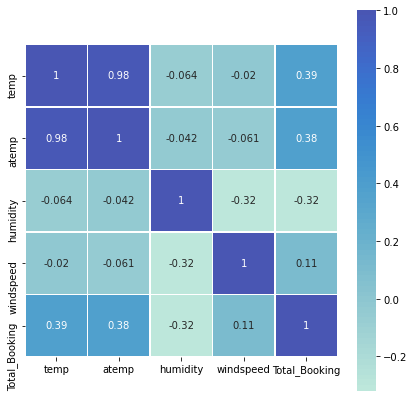

In [23]:
f,axes = plt.subplots(1,1,figsize = (7,7))
corr = train[['temp','atemp','humidity', 'windspeed','Total_Booking']].corr()
sbn.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)
plt.show()

## Inferences ##
- temp and atemp have a very strong positive correlation. They are highly correlated. Thus we can keep temp as a variable and drop atemp without any loss of information. 

- We can infer from the correlaton matrix that humidity has almost no correlation with the Total_Booking. So we can drop humidity

In [24]:
# dropping atemp,humidity
train = train.drop(columns=['atemp','humidity','date'])
train.shape

(8526, 10)

In [25]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'windspeed',
       'Total_Booking', 'hour', 'weekDay', 'month'],
      dtype='object')

## Data Visualization ##

### Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well ###

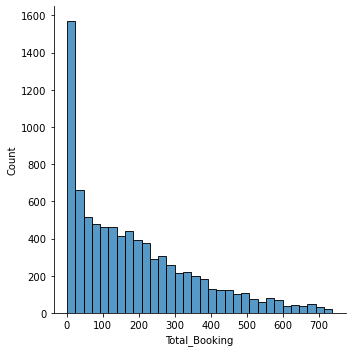

In [26]:
sbn.displot(train, x="Total_Booking")
plt.show()

C:\Users\MSAILAK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


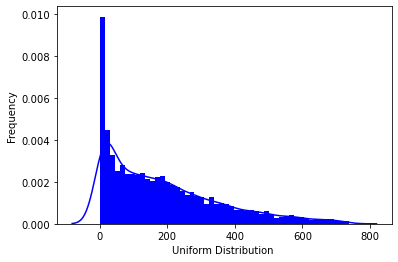

In [27]:
ax = sbn.distplot(train['Total_Booking'],
                  bins=50,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
plt.show()

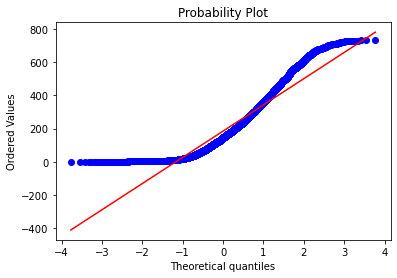

In [28]:
plt = stats.probplot(train['Total_Booking'], plot=sbn.mpl.pyplot)

### Visualizing Total_booking Vs other features to generate insights ###


<AxesSubplot:xlabel='month', ylabel='Total_Booking'>

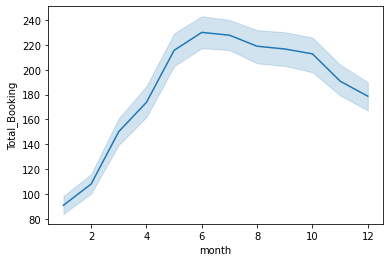

In [29]:
# Show the Line Plot Between Total_Booking column vs season
sbn.lineplot(x="month", y="Total_Booking", data=train)

<AxesSubplot:xlabel='season', ylabel='Total_Booking'>

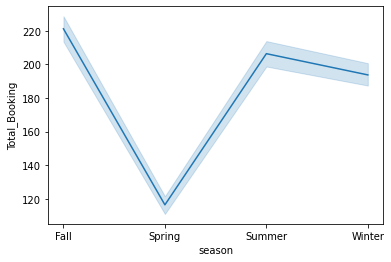

In [30]:
# Show the Line Plot Between Total_Booking column vs season
sbn.lineplot(x="season", y="Total_Booking", data=train)

<AxesSubplot:xlabel='hour', ylabel='Total_Booking'>

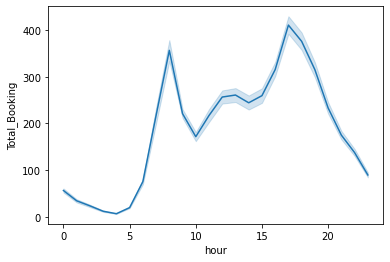

In [31]:
# Show the Line Plot Between Total_Booking column vs hour
sbn.lineplot(x="hour", y="Total_Booking", data=train)

<AxesSubplot:xlabel='weekDay', ylabel='Total_Booking'>

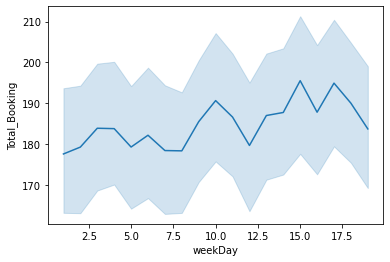

In [32]:
# Show the Line Plot Between Total_Booking column vs season
sbn.lineplot(x="weekDay", y="Total_Booking", data=train)

### Use Histograms to plot all the continuous variables present in the data ###

In [33]:
train.head(1)

,season,holiday,workingday,weather,temp,windspeed,Total_Booking,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,16.9979,504,19,2,5


C:\Users\MSAILAK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

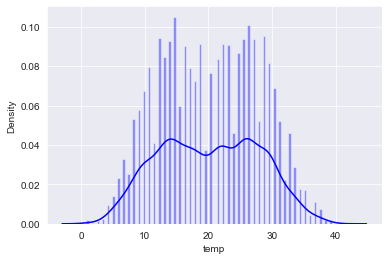

In [34]:
#Histogram for temp
sbn.set_style('darkgrid')
sbn.distplot(train['temp'], bins = 100, color = 'blue')

C:\Users\MSAILAK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

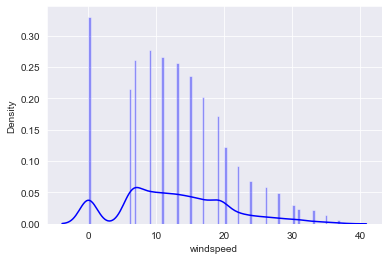

In [35]:
#Histogram for windspeed
sbn.set_style('darkgrid')
sbn.distplot(train['windspeed'], bins = 100, color = 'blue')

## Convert the categorical variables into one hot vector ##

In [36]:
train.head(1)

,season,holiday,workingday,weather,temp,windspeed,Total_Booking,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,16.9979,504,19,2,5


In [37]:
train.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
windspeed         float64
Total_Booking       int64
hour                int64
weekDay             int64
month               int64
dtype: object

In [38]:
train =  pd.get_dummies(train,drop_first=True)

In [39]:
train.head(2)

,temp,windspeed,Total_Booking,hour,weekDay,month,season_Spring,season_Summer,season_Winter,holiday_1,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,22.14,16.9979,504,19,2,5,0,1,0,0,1,0,0,0
1,28.70,19.0012,5,4,5,9,0,0,0,0,1,0,0,0


## Split your dataset for training and testing ##

In [40]:
#train test split
temp = train.drop(['Total_Booking'], axis=1)
X = temp
y = train['Total_Booking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
X.head(2)

,temp,windspeed,hour,weekDay,month,season_Spring,season_Summer,season_Winter,holiday_1,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,22.14,16.9979,19,2,5,0,1,0,0,1,0,0,0
1,28.70,19.0012,4,5,9,0,0,0,0,1,0,0,0


###  Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor) ###

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse1 = math.sqrt(mse)
rmse1

66.4152116268824

In [43]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(n_estimators = 300)
ab.fit(X_train, y_train)
pred = ab.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse2 = math.sqrt(mse)
rmse2

110.9486219398123

In [44]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor(n_estimators = 500)
br.fit(X_train, y_train)
pred = br.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse3 = math.sqrt(mse)
rmse3

66.51999118810726

In [45]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse4 = math.sqrt(mse)
rmse4

136.65367406877087

In [46]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, y_train)
pred = knr.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse5 = math.sqrt(mse)
rmse5

106.46976540808006

In [47]:
model = ['RandomForestReg','AdaBoostReg','BaggingReg','SVR','KNeighborsReg']
rmse = [rmse1,rmse2,rmse3,rmse4,rmse5]

In [48]:
rmse_frame=pd.DataFrame({'Algorithms':model, 'RMSE':rmse})
rmse_frame.sort_values(by='RMSE')

,Algorithms,RMSE
0,RandomForestReg,66.415212
2,BaggingReg,66.519991
4,KNeighborsReg,106.469765
1,AdaBoostReg,110.948622
3,SVR,136.653674


C:\Users\MSAILAK\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


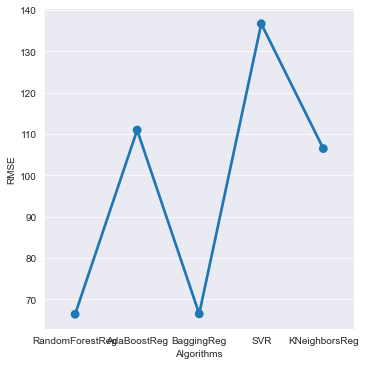

In [49]:
sbn.factorplot(x='Algorithms',y='RMSE',data = rmse_frame)

### Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_ ###

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

model = RandomForestRegressor()
n_estimators = list(range(50, 800, 50))
max_depth = [3,5,7,9]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
print(param_grid)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error",
                           cv=kfold, n_jobs=-1, verbose=1, return_train_score=True)

grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (abs(grid_result.best_score_),grid_result.best_params_))


{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750], 'max_depth': [3, 5, 7, 9]}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best: 71.507651 using {'max_depth': 9, 'n_estimators': 450}


In [51]:
(abs(grid_result.best_score_),grid_result.best_params_)

(71.50765124342783, {'max_depth': 9, 'n_estimators': 450})

### Perform prediction on the test set and print the mean_squared_log_error ###

In [55]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [56]:
test.describe()

,holiday,workingday,temp,atemp,humidity,windspeed
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,0.028926,0.683196,20.182241,23.653214,62.835170,12.621496
std,0.167636,0.465337,7.704978,8.369721,19.401161,8.060062
min,0.000000,0.000000,3.280000,3.790000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,48.000000,7.001500
50%,0.000000,1.000000,20.500000,24.240000,63.000000,11.001400
75%,0.000000,1.000000,26.240000,31.060000,78.000000,16.997900
max,1.000000,1.000000,38.540000,44.695000,100.000000,56.996900


In [57]:
test=test.drop_duplicates()
test.shape

(2178, 9)

In [58]:
train.isnull().sum(axis=0)

temp                                   0
windspeed                              0
Total_Booking                          0
hour                                   0
weekDay                                0
month                                  0
season_Spring                          0
season_Summer                          0
season_Winter                          0
holiday_1                              0
workingday_1                           0
weather_ Heavy Rain + Thunderstorm     0
weather_ Light Snow, Light Rain        0
weather_ Mist + Cloudy                 0
dtype: int64

In [59]:
test['date'] = pd.to_datetime(test.datetime).dt.date
test['hour'] = pd.to_datetime(test.datetime).dt.hour
test['weekDay'] = pd.to_datetime(test.datetime, format='%m/%d/%Y %H:%M').dt.day
test['month'] = pd.to_datetime(test.datetime, format='%m/%d/%Y %H:%M').dt.month

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekDay,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,2012-05-10,11,10,5
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,2012-06-09,7,9,6
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,2011-03-06,20,6,3
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,2011-10-13,11,13,10
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,2012-06-02,12,2,6


In [60]:
test = test.astype({'season':'category', 'holiday':'category','workingday':'category','weather':'category'})

In [61]:
test.shape

(2178, 13)

In [62]:
test.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
date            object
hour             int64
weekDay          int64
month            int64
dtype: object

In [63]:
test = test.drop(columns=['datetime'])
test.shape

(2178, 12)

In [64]:
# dropping atemp,humidity
test = test.drop(columns=['atemp','humidity','date'])
test.shape

(2178, 9)

In [65]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'windspeed',
       'hour', 'weekDay', 'month'],
      dtype='object')

In [66]:
test =  pd.get_dummies(test,drop_first=True)

In [67]:
test.head()

,temp,windspeed,hour,weekDay,month,season_Spring,season_Summer,season_Winter,holiday_1,workingday_1,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,21.32,35.0008,11,10,5,0,1,0,0,1,0,0
1,23.78,7.0015,7,9,6,0,1,0,0,0,0,0
2,11.48,27.9993,20,6,3,1,0,0,0,0,1,0
3,25.42,0.0000,11,13,10,0,0,1,0,1,0,1
4,25.42,23.9994,12,2,6,0,1,0,0,0,0,0


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

model = RandomForestRegressor(n_estimators=450,max_depth=9)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=450)

In [78]:
test['weather_ Heavy Rain + Thunderstorm']=0
test.shape

(2178, 13)

In [79]:
test_pred = model.predict(test)

In [80]:
test_pred = np.round(test_pred)

In [81]:
test_pred.shape,test_label.shape

((2178,), (2178, 1))

In [82]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(test_label, test_pred)

0.25657487644547167